In [1]:
url = 'https://en.wikipedia.org/wiki/Big_data'
url = 'https://en.wikipedia.org/wiki/Machine_learning'


## Getting the Data
First step in every data science process is getting the data. We will use `requests` library to do that:

In [2]:
#use the request library to get data
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-

## TRANSFORM DATA

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 5.10 Survey science 5.11 Marketing 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4 United Kingdom 6.1.5 United States 6.2 Retail 6.3 Science 6

## GETTING INSIGHTS

In [4]:
#install rake for keyword extraction
import sys
!{sys.executable} -m pip install nlp_rake

In [5]:
#use rake for keyword extraction
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('data management', 3.916666666666667),
 ('artificial intelligence', 3.9),
 ('predictive analytics', 3.85),
 ('special issue', 3.8),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.757142857142857),
 ('covid-19 pandemic', 3.75),
 ('^ kitchin', 3.7396907216494846),
 ('promotional source', 3.7142857142857144),
 ('york times', 3.642857142857143),
 ('financial times', 3.642857142857143),
 ('data sources', 3.6363636363636367),
 ('unstructured data', 3.625),
 ('cloud computing', 3.614285714285714),
 ('data mining', 3.6),
 ('national archives', 3.583333333333333),
 ('structured data', 3.571428571428571),
 ('marketing affordances', 3.5454545454545454),
 ('data analysis', 3.4761904761

## DATA VISUALIZATION

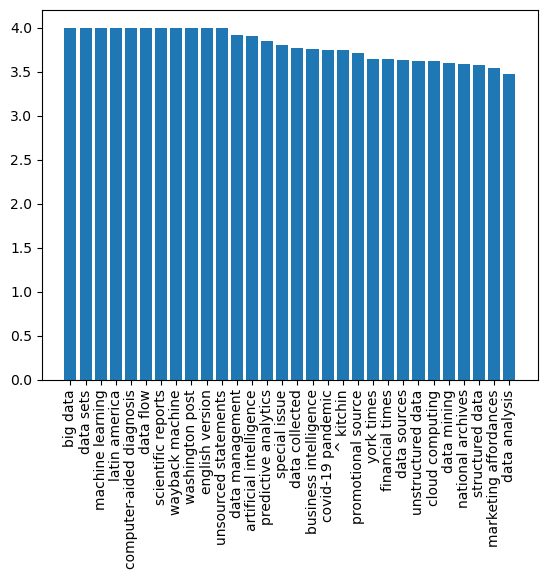

In [6]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

## WORD CLOUD IS A BETTER WAY OF VISUALIZING THIS

In [ ]:
# install wordcloud
!{sys.executable} -m pip install wordcloud

### WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using matplotlib:

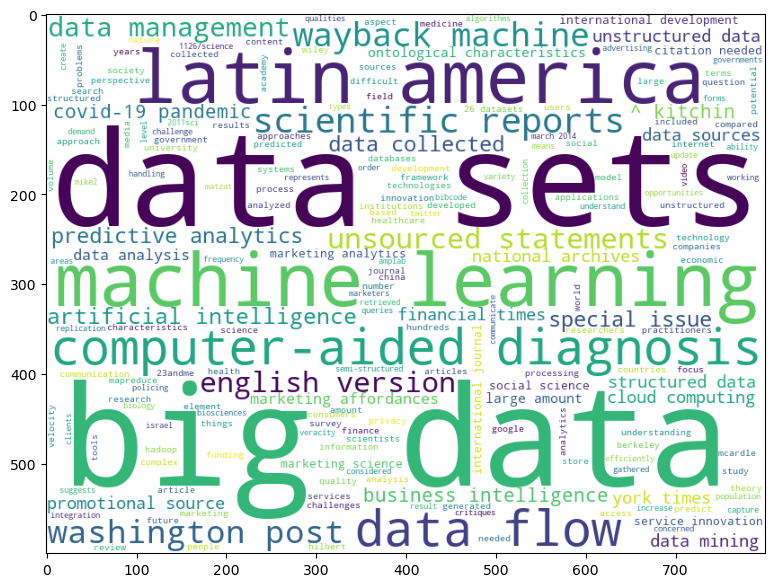

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

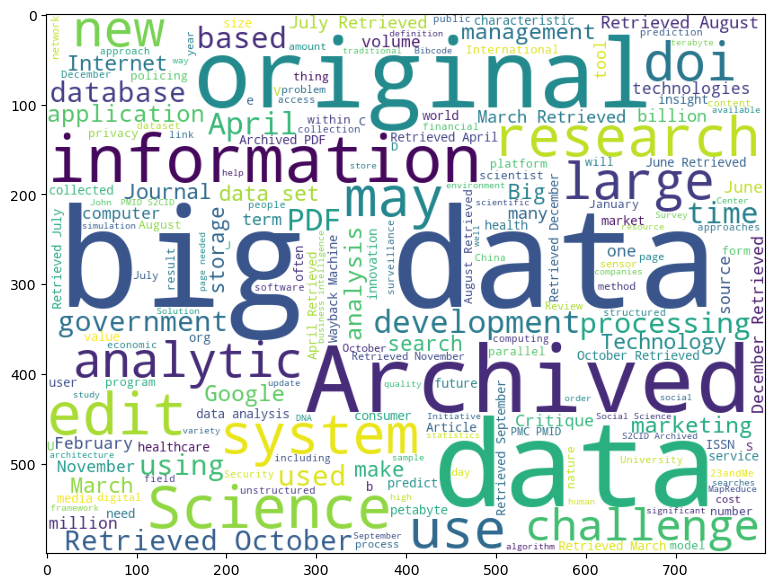

In [8]:
#We can also pass in the original text to WordCloud - let's see if we are able to get similar result:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [9]:
import os
# Create 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Save word cloud to file
#wc.to_file('images/ds_wordcloud.png')
wc.generate(text).to_file('images/ds_wordcloud.png')
#wc.to_file('images/ds_wordcloud.png')